# 底打ちどころを探る

## 目的

時価総額の大きい銘柄の値動きのトレンドを読むことで、底打ちどころを探る

In [1]:
import datetime
import re

import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
def get_code_into(code):
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    print(code, ticker.info['longName'])
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new   
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    print(ser.tail(3))

### 東証で時価総額上位

Reference: https://www.nikkei.com/marketdata/ranking-jp/market-cap-high/

In [3]:
pattern = re.compile(r'([0-9]{4}-[0-9]{2}-[0-9]{2}).*')

In [4]:
pattern_code = re.compile(r'^(.+)([0-9A]{4}).+$')

ods_name = 'mkt_capital_top_30.ods'
df_ods = pd.read_excel(ods_name)
list_code = list()
for name in df_ods['銘柄名']:
    m = pattern_code.match(name)
    if m:
        print(m.group(1))
        code = m.group(2)
        list_code.append(code)
    else:
        print('ERROR!', name)
print(list_code)

トヨタ
ソニーＧ
三菱ＵＦＪ
日立
任天堂
ファストリ
キーエンス
中外薬
ＮＴＴ
三井住友ＦＧ
リクルート
伊藤忠
ＫＤＤＩ
東京海上
三菱商
ＳＢＧ
ＳＢ
東エレク
三菱重
みずほＦＧ
ＪＴ
信越化
三井物
ホンダ
第一三共
武田
富士通
キヤノン
三菱電
ＨＯＹＡ
['7203', '6758', '8306', '6501', '7974', '9983', '6861', '4519', '9432', '8316', '6098', '8001', '9433', '8766', '8058', '9984', '9434', '8035', '7011', '8411', '2914', '4063', '8031', '7267', '4568', '4502', '6702', '7751', '6503', '7741']


In [5]:
dt = pd.to_datetime('2025-03-27')
dt

Timestamp('2025-03-27 00:00:00')

In [6]:
summary = pd.DataFrame()
for code in list_code:
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-17', interval='1d')
    if len(df) == 0:
        print('### no data in', symbol)
        continue
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new            
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    summary[code] = ser

summary

,7203,6758,8306,6501,7974,9983,6861,4519,9432,8316,...,2914,4063,8031,7267,4568,4502,6702,7751,6503,7741
2025-03-17,0.975959,0.929311,0.931834,1.000535,0.932457,0.976774,0.984878,0.974854,0.985333,0.956735,...,0.944671,0.981641,0.926024,1.013736,0.944073,0.980070,0.976467,1.007602,1.033367,0.985589
2025-03-18,1.003712,0.945365,0.966720,1.016051,0.931097,0.987527,0.987870,0.970166,0.996000,0.978859,...,0.964790,0.987835,0.954590,1.042582,0.945411,0.988831,0.995809,1.006575,1.002724,0.993784
2025-03-19,1.022450,0.953392,0.966491,0.998662,0.956482,0.981075,0.985444,0.956954,1.000000,0.978859,...,0.970778,1.000442,0.983157,1.040865,0.960931,0.993868,0.993230,1.010068,1.011066,0.985024
2025-03-21,1.005657,0.979285,1.021804,1.007758,0.987761,0.975054,0.991428,0.976843,0.993333,1.014995,...,0.972455,0.988277,0.988276,1.032280,0.990634,0.996934,0.976144,0.999384,0.979911,0.993218
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.969175,0.973763,0.988840,0.983236,0.984000,0.992380,...,0.972455,0.980535,0.970608,1.031250,0.994916,0.994306,0.986138,0.984179,0.975996,0.988415
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.975975,0.979355,0.988193,0.999574,0.983333,0.980088,...,0.990419,0.984738,0.975727,1.032280,0.994113,0.995401,0.964055,0.994658,0.961185,1.003673
2025-03-26,1.020859,0.997411,0.991049,1.014714,1.027199,0.993548,0.993692,1.007387,0.992000,0.985988,...,0.993772,0.990047,0.987450,1.025412,0.996521,0.992992,0.964055,0.996507,0.995063,1.006782
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.985511,0.991389,0.989588,0.983656,0.973799,1.000426,0.994573,0.967552,...,1.005749,0.986347,0.988415,0.973980,0.989749,0.999776,1.011334,0.989727,0.976092,0.991806
2025-03-31,0.941515,0.977414,0.939939,0.930571,0.923372,0.947527,0.945819,0.965904,0.981683,0.932891,...,0.985389,0.948075,0.940060,0.944093,0.947127,0.987690,0.955635,0.954387,0.935673,0.948290


In [7]:
summary

,7203,6758,8306,6501,7974,9983,6861,4519,9432,8316,...,2914,4063,8031,7267,4568,4502,6702,7751,6503,7741
2025-03-17,0.975959,0.929311,0.931834,1.000535,0.932457,0.976774,0.984878,0.974854,0.985333,0.956735,...,0.944671,0.981641,0.926024,1.013736,0.944073,0.980070,0.976467,1.007602,1.033367,0.985589
2025-03-18,1.003712,0.945365,0.966720,1.016051,0.931097,0.987527,0.987870,0.970166,0.996000,0.978859,...,0.964790,0.987835,0.954590,1.042582,0.945411,0.988831,0.995809,1.006575,1.002724,0.993784
2025-03-19,1.022450,0.953392,0.966491,0.998662,0.956482,0.981075,0.985444,0.956954,1.000000,0.978859,...,0.970778,1.000442,0.983157,1.040865,0.960931,0.993868,0.993230,1.010068,1.011066,0.985024
2025-03-21,1.005657,0.979285,1.021804,1.007758,0.987761,0.975054,0.991428,0.976843,0.993333,1.014995,...,0.972455,0.988277,0.988276,1.032280,0.990634,0.996934,0.976144,0.999384,0.979911,0.993218
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.969175,0.973763,0.988840,0.983236,0.984000,0.992380,...,0.972455,0.980535,0.970608,1.031250,0.994916,0.994306,0.986138,0.984179,0.975996,0.988415
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.975975,0.979355,0.988193,0.999574,0.983333,0.980088,...,0.990419,0.984738,0.975727,1.032280,0.994113,0.995401,0.964055,0.994658,0.961185,1.003673
2025-03-26,1.020859,0.997411,0.991049,1.014714,1.027199,0.993548,0.993692,1.007387,0.992000,0.985988,...,0.993772,0.990047,0.987450,1.025412,0.996521,0.992992,0.964055,0.996507,0.995063,1.006782
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.985511,0.991389,0.989588,0.983656,0.973799,1.000426,0.994573,0.967552,...,1.005749,0.986347,0.988415,0.973980,0.989749,0.999776,1.011334,0.989727,0.976092,0.991806
2025-03-31,0.941515,0.977414,0.939939,0.930571,0.923372,0.947527,0.945819,0.965904,0.981683,0.932891,...,0.985389,0.948075,0.940060,0.944093,0.947127,0.987690,0.955635,0.954387,0.935673,0.948290


In [8]:
df_ranking = summary.tail(1).iloc[0].sort_values(ascending=False)
df_ranking

4519    1.198892
7974    1.109234
2914    1.063473
7011    1.059277
9433    1.056470
6702    1.033031
7267    1.030239
9434    1.018815
8001    1.016650
9432    1.016282
9983    1.012043
6861    1.001617
7741    0.992088
6098    0.991912
6501    0.990581
7203    0.990103
4063    0.988138
4568    0.985972
4502    0.978514
6503    0.978156
8058    0.976381
8035    0.951548
6758    0.950935
8766    0.939811
8031    0.936870
7751    0.915348
9984    0.914375
8306    0.832905
8316    0.822763
8411    0.795923
Name: 2025-05-01 00:00:00, dtype: float64

In [9]:
list_ranking = df_ranking.index[0:11]
for code in list_ranking:
    get_code_into(code)
    print()

print('Median')
print(summary.median(axis=1).tail(3))

4519 Chugai Pharmaceutical Co., Ltd.
2025-04-28    1.139082
2025-04-30    1.167637
2025-05-01    1.198892
Name: Close, dtype: float64

7974 Nintendo Co., Ltd.
2025-04-28    1.044388
2025-04-30    1.080464
2025-05-01    1.109234
Name: Close, dtype: float64

2914 Japan Tobacco Inc.
2025-04-28    1.049581
2025-04-30    1.055569
2025-05-01    1.063473
Name: Close, dtype: float64

7011 Mitsubishi Heavy Industries, Ltd.
2025-04-28    1.059654
2025-04-30    1.052503
2025-05-01    1.059277
Name: Close, dtype: float64

9433 KDDI Corporation
2025-04-28    1.056262
2025-04-30    1.051677
2025-05-01    1.056470
Name: Close, dtype: float64

6702 Fujitsu Limited
2025-04-28    1.018459
2025-04-30    1.020402
2025-05-01    1.033031
Name: Close, dtype: float64

7267 Honda Motor Co., Ltd.
2025-04-28    1.020745
2025-04-30    1.021800
2025-05-01    1.030239
Name: Close, dtype: float64

9434 SoftBank Corp.
2025-04-28    1.019755
2025-04-30    1.015522
2025-05-01    1.018815
Name: Close, dtype: float64

80

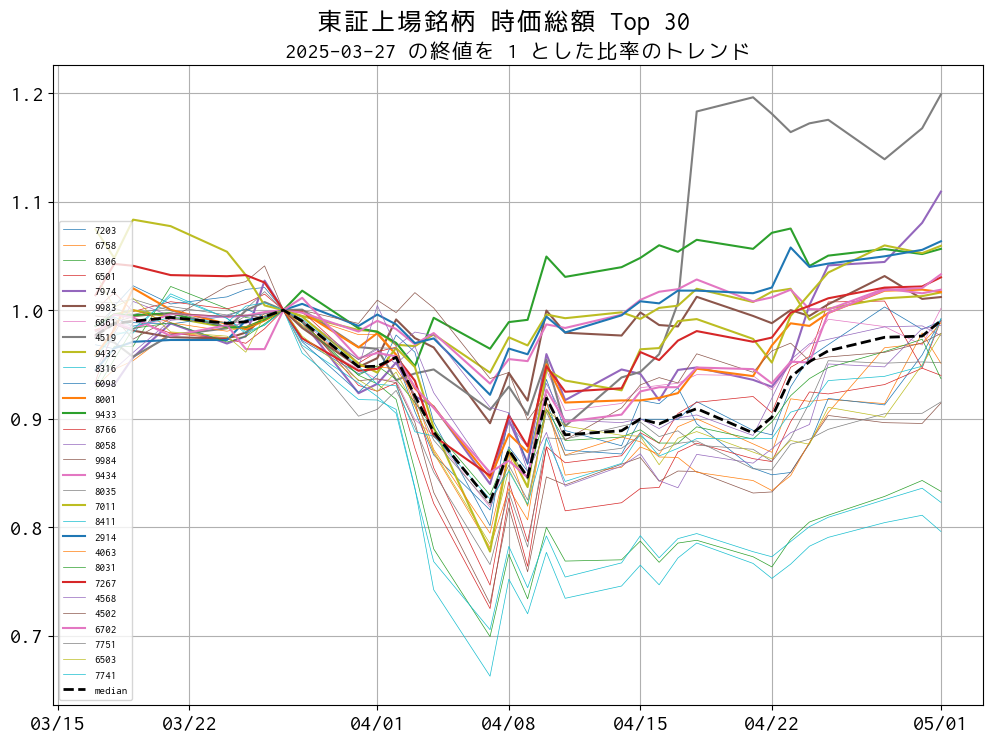

In [10]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(top=0.91)

for colname in summary.columns:
    if colname in list_ranking:
        width = 1.5
        lstyle = 'solid'
    else:
        width = 0.5
        lstyle = 'solid'

    ax.plot(summary[colname], lw=width, ls=lstyle, label=colname)

ax.plot(summary.median(axis=1), lw=2, color='black', ls='dashed', label='median')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
#ax.xaxis.set_ticks(df.index)

m = pattern.match(str(dt))
date_str = m.group(1)
fig.suptitle('東証上場銘柄 時価総額 Top 30')
ax.set_title('%s の終値を 1 とした比率のトレンド' % date_str, fontsize=16)
ax.grid()
ax.legend(loc='lower left', fontsize=8)

plt.savefig('report_bottom_out.png' )
plt.show()

In [11]:
summary.median(axis=1)

2025-03-17    0.976621
2025-03-18    0.987693
2025-03-19    0.989715
2025-03-21    0.993276
2025-03-24    0.987860
2025-03-25    0.989306
2025-03-26    0.993942
2025-03-27    1.000000
2025-03-28    0.989875
2025-03-31    0.947801
2025-04-01    0.948237
2025-04-02    0.956507
2025-04-03    0.920925
2025-04-04    0.887610
2025-04-07    0.823181
2025-04-08    0.870940
2025-04-09    0.846023
2025-04-10    0.918871
2025-04-11    0.885028
2025-04-14    0.888795
2025-04-15    0.899649
2025-04-16    0.895106
2025-04-17    0.902677
2025-04-18    0.909153
2025-04-21    0.886798
2025-04-22    0.901227
2025-04-23    0.938267
2025-04-24    0.952486
2025-04-25    0.962476
2025-04-28    0.974933
2025-04-30    0.976054
2025-05-01    0.990342
dtype: float64